In [2]:
# Importing the pandas library 
import pandas as pd

# Defining the file paths for the Excel files
file1_path = 'Variables.xlsx'
file2_path = 'Signal.xlsx'

# Loading the first Excel file into a Pandas DataFrame (Variable_df)
# Indexing the DataFrame by the "Sample.ID" column
Variable_df = pd.read_excel(file1_path, index_col="Sample.ID")

# Loading the second Excel file into a Pandas DataFrame (Signal_df)
Signal_df = pd.read_excel(file2_path)

In [3]:
# Filtering out rows in Variable_df where the index (Sample.ID) is not NaN
Variable_df = Variable_df[Variable_df.index.notna()]

# Displaying the first few rows of the modified Variable_df DataFrame
Variable_df.head()

,Tissue,family,lipid,Carbons,Unsaturations,RT/s,Adduct,mz,ppm m/z adduct,MS/MS: m/z and fragment identification
Sample.ID,,,,,,,,,,
Var_001,Liver,FA,FA(16:0),16.0,0.0,248.01,[M-H]-,255.2311,-5.3,NaN
Var_002,Liver,FA,FA(16:1),16.0,1.0,189.16,[M-H]-,253.2150,-7.0,NaN
Var_003,Liver,FA,FA(17:0),17.0,0.0,291.59,[M-H]-,269.2463,-6.6,NaN
Var_004,Liver,FA,FA(18:0),18.0,0.0,337.64,[M-H]-,283.2626,-3.7,NaN
Var_005,Liver,FA,FA(18:1),18.0,1.0,263.97,[M-H]-,281.2468,-4.3,NaN


In [4]:
# Displaying the first few rows of the Signal_df DataFrame
Signal_df.head()

,Sample.ID,Var_001,Var_002,Var_003,Var_004,Var_005,Var_006,Var_007,Var_008,Var_009,...,Var_273,Var_274,Var_275,Var_276,Var_277,Var_278,Var_279,Var_280,Var_281,Var_282
0,Control,3.743703e+06,124938.293443,34342.771479,3.237222e+06,2.276154e+06,1.839204e+06,34907.607230,89996.944201,16844.085970,...,39349.094639,6.411240e+06,8.243266e+06,3.076412e+06,2.455682e+06,468789.312115,949536.203293,3.570646e+06,4.383112e+06,2.158539e+06
1,Control,4.545332e+06,162651.056409,40449.353857,3.890073e+06,2.257932e+06,3.007269e+06,33246.503553,127398.013042,13204.654585,...,29369.195038,6.363726e+06,5.798586e+06,2.158112e+06,1.785545e+06,352497.817013,690960.075104,2.488717e+06,3.200070e+06,1.619211e+06
2,Control,3.142453e+06,103221.231656,29182.411423,2.627076e+06,1.540911e+06,2.041866e+06,25659.926526,98065.682695,11812.441165,...,33187.685432,5.945556e+06,5.600473e+06,2.195959e+06,1.721911e+06,306371.714952,717631.631767,2.254739e+06,2.695617e+06,1.367343e+06
3,Control,3.773138e+06,104932.822063,34026.158212,2.841866e+06,1.662993e+06,2.293310e+06,31054.234981,101527.723095,11785.194302,...,69340.069989,6.789466e+06,7.698741e+06,3.039581e+06,2.313398e+06,455964.333446,997880.883644,3.242283e+06,4.038372e+06,2.141077e+06
4,Control,3.685081e+06,174503.307487,29162.548885,2.856276e+06,2.873556e+06,2.286710e+06,26944.366367,97810.560016,15314.622647,...,48330.138407,6.126495e+06,7.161421e+06,2.801062e+06,2.673250e+06,466810.036712,991277.194366,3.351846e+06,4.238467e+06,1.897259e+06


In [5]:
# Transposing the Signal_df DataFrame to swap rows and columns
transposed_signal_df = Signal_df.T

# Setting the columns of transposed_signal_df to the values in the first row
transposed_signal_df.columns = transposed_signal_df.iloc[0]

# Dropping the first row as it is now duplicated in the column headers
transposed_signal_df = transposed_signal_df[1:]

# Displaying the first few rows of the modified transposed_signal_df DataFrame
transposed_signal_df.head()


Sample.ID,Control,Control,Control,Control,Control,Control,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,...,i.V. 168h,i.V. dd 72h,i.V. dd 72h,i.V. dd 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h
Var_001,3743702.719371,4545331.53089,3142453.277634,3773137.834686,3685081.419616,3421208.186595,3626865.772023,7160713.896136,4263484.5114,4975084.716659,...,3117842.759022,4517887.479364,4064940.060888,4218097.668331,2472104.128549,3531767.030695,3337174.694232,2864634.517867,4934104.455598,3825841.284982
Var_002,124938.293443,162651.056409,103221.231656,104932.822063,174503.307487,126512.768097,221034.267095,974553.870605,313067.711683,197446.543341,...,187966.125969,93960.243941,114351.083354,89417.739309,30653.459677,68323.560736,65259.573387,48007.093489,455564.877945,71972.762306
Var_003,34342.771479,40449.353857,29182.411423,34026.158212,29162.548885,27475.01862,29583.964958,40599.401482,35031.983025,29147.454602,...,36753.068781,31032.280462,36779.41235,30906.383901,26962.467784,28147.30743,23641.461386,23358.659683,30930.239555,19860.568251
Var_004,3237221.917914,3890073.086094,2627075.939279,2841866.205073,2856276.476992,2418878.431989,2400268.806349,3036836.865801,2421336.367394,2922647.219063,...,2494459.703331,4052450.385699,2965810.810359,2781881.903864,2943109.761655,2917898.265298,2939001.335915,2884041.277203,2418743.922404,3099203.366032
Var_005,2276153.524206,2257931.672254,1540910.816543,1662993.437853,2873556.316456,2008735.84093,2196803.710126,10993933.17595,3567994.970135,2884802.89475,...,1609043.699756,1253800.708666,1383873.611842,1164111.261973,530716.837858,1077920.175003,1074806.065564,809856.305554,6065633.112668,1098639.216255


In [6]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extracting the features (Var_001 to Var_282) from Signal_df for PCA
features = Signal_df.iloc[:, 1:]

# Initializing a StandardScaler to standardize the features
scaler = StandardScaler()

# Standardizing the features by removing the mean and scaling to unit variance
features_standardized = scaler.fit_transform(features)


In [7]:
# Apply PCA with the desired number of components
num_components = 2  # You can change this to the number of components you want
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable to the principal DataFrame
principal_df['Sample.ID'] = Signal_df['Sample.ID']
principal_df.head()


,PC1,PC2,Sample.ID
0,9.413856,-1.022951,Control
1,-0.028738,-9.427465,Control
2,3.870471,-6.907008,Control
3,6.982983,-1.638149,Control
4,-0.087840,-6.539702,Control


In [8]:
principal_components

array([[ 9.41385608e+00, -1.02295074e+00],
       [-2.87381426e-02, -9.42746548e+00],
       [ 3.87047096e+00, -6.90700774e+00],
       [ 6.98298287e+00, -1.63814906e+00],
       [-8.78400247e-02, -6.53970153e+00],
       [ 1.09241122e+01,  1.32925801e+00],
       [ 5.82860277e+00, -6.38528748e+00],
       [ 3.73273726e+00, -1.37534319e+01],
       [ 1.38817536e+01,  4.56310900e+00],
       [-1.40099479e+00, -9.66953149e+00],
       [ 2.81626902e+00, -3.17061755e+00],
       [ 1.20511892e+01,  1.67016731e+00],
       [ 4.03030428e-01,  7.88308311e-01],
       [ 4.55032360e+00, -2.96178926e+00],
       [-4.88555135e+00, -5.31768396e+00],
       [ 5.85302904e+00, -8.89561079e-01],
       [ 8.89909061e+00,  6.94514212e+00],
       [ 2.40166930e+00,  3.82638689e+00],
       [ 8.41164113e-01,  5.85659309e-01],
       [-7.60197522e+00, -2.64058810e+00],
       [-5.34665469e-01,  4.72141833e+00],
       [-1.22810398e+01, -6.81279916e+00],
       [-1.23034092e-02,  1.03448100e+01],
       [-1.

In [47]:

# Importing the NumPy library 

import numpy as np

# Get the loadings from the PCA model
loadings = pca.components_.T  # Transpose to have loadings in rows

# Create a DataFrame with loadings
loadings_df = pd.DataFrame(data=loadings, columns=['PC1_loadings', 'PC2_loadings'], index=features.columns)



In [48]:
# Displaying the first few rows of the loadings_df DataFrame

loadings_df.head()

,PC1_loadings,PC2_loadings
Var_001,-0.005098,-0.052275
Var_002,0.043666,-0.071817
Var_003,-0.009278,-0.073087
Var_004,-0.045011,-0.001792
Var_005,0.039243,-0.071956


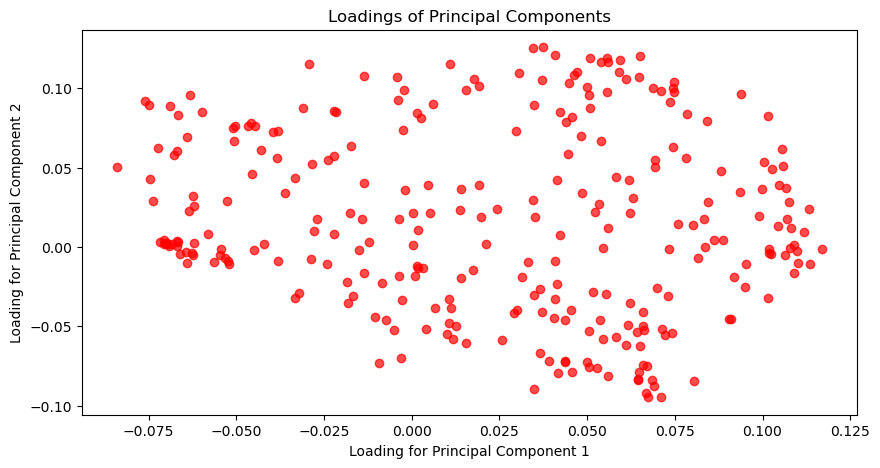

In [49]:
# Plot the loadings
plt.figure(figsize=(10, 5))
plt.scatter(loadings_df['PC1_loadings'], loadings_df['PC2_loadings'], marker='o', color='red', alpha=0.7)
plt.title('Loadings of Principal Components')
plt.xlabel('Loading for Principal Component 1')
plt.ylabel('Loading for Principal Component 2')


plt.show()


In [50]:
# Merging Variable_df and loadings_df based on their indices (Sample.ID)
# The left_index and right_index parameters specify that the merge should be based on the indices of the DataFrames
merged_df = Variable_df.merge(loadings_df, left_index=True, right_index=True)

# Displaying the first few rows of the merged DataFrame
merged_df.head()


,Tissue,family,lipid,Carbons,Unsaturations,RT/s,Adduct,mz,ppm m/z adduct,MS/MS: m/z and fragment identification,PC1_loadings,PC2_loadings
Sample.ID,,,,,,,,,,,,
Var_001,Liver,FA,FA(16:0),16.0,0.0,248.01,[M-H]-,255.2311,-5.3,NaN,-0.005098,-0.052275
Var_002,Liver,FA,FA(16:1),16.0,1.0,189.16,[M-H]-,253.2150,-7.0,NaN,0.043666,-0.071817
Var_003,Liver,FA,FA(17:0),17.0,0.0,291.59,[M-H]-,269.2463,-6.6,NaN,-0.009278,-0.073087
Var_004,Liver,FA,FA(18:0),18.0,0.0,337.64,[M-H]-,283.2626,-3.7,NaN,-0.045011,-0.001792
Var_005,Liver,FA,FA(18:1),18.0,1.0,263.97,[M-H]-,281.2468,-4.3,NaN,0.039243,-0.071956


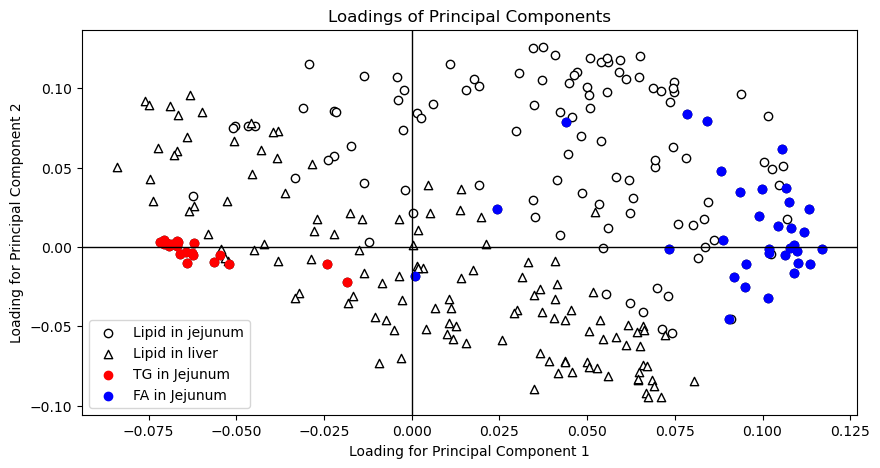

In [51]:
# Plot the loadings
plt.figure(figsize=(10, 5))

# Scatter plot for Jejunum
plt.scatter(merged_df[merged_df['Tissue'] == 'Jejunum']['PC1_loadings'],
                              merged_df[merged_df['Tissue'] == 'Jejunum']['PC2_loadings'],
                              marker='o', facecolors='white', edgecolors='black', label='Lipid in jejunum')

# Scatter plot for Liver
plt.scatter(merged_df[merged_df['Tissue'] == 'Liver']['PC1_loadings'],
                            merged_df[merged_df['Tissue'] == 'Liver']['PC2_loadings'],
                            marker='^', facecolors='white', edgecolors='black', label='Lipid in liver')

# Scatter plot for Jejunum TG (red)
plt.scatter(merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'TG')]['PC1_loadings'],
                        merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'TG')]['PC2_loadings'],
                        marker='o', facecolors='red', label='TG in Jejunum ')

# Scatter plot for Jejunum FA (blue)
plt.scatter(merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'FA')]['PC1_loadings'],
                        merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'FA')]['PC2_loadings'],
                        marker='o', facecolors='blue', label='FA in Jejunum ')

# Set labels and title
plt.title('Loadings of Principal Components')
plt.xlabel('Loading for Principal Component 1')
plt.ylabel('Loading for Principal Component 2')

# Add lines at x and y = 0
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.axvline(0, color='black', linestyle='-', linewidth=1)

# Add legend
plt.legend(loc='lower left')

# Show the plot
plt.show()


In [67]:
# Displaying the first few rows of the principal_df dataframe

principal_df.head()

,PC1,PC2,Sample.ID
0,9.413856,-1.022951,Control
1,-0.028738,-9.427465,Control
2,3.870471,-6.907008,Control
3,6.982983,-1.638149,Control
4,-0.087840,-6.539702,Control


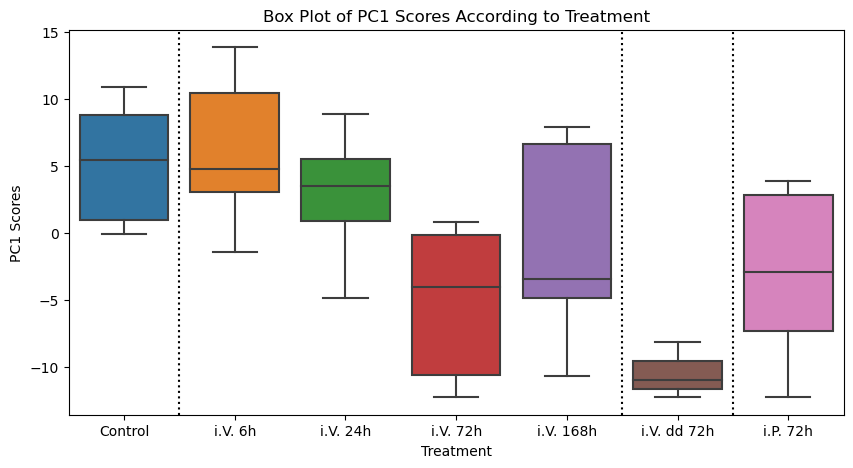

In [52]:
import seaborn as sns

# Create a box plot using Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sample.ID', y='PC1', data=principal_df)

plt.axvline(x=0.5, linestyle='dotted', color='black')
plt.axvline(x=4.5, linestyle='dotted', color='black')
plt.axvline(x=5.5, linestyle='dotted', color='black')

# Customize the plot
plt.title('Box Plot of PC1 Scores According to Treatment')
plt.xlabel('Treatment')
plt.ylabel('PC1 Scores')

# Show the plot
plt.show()

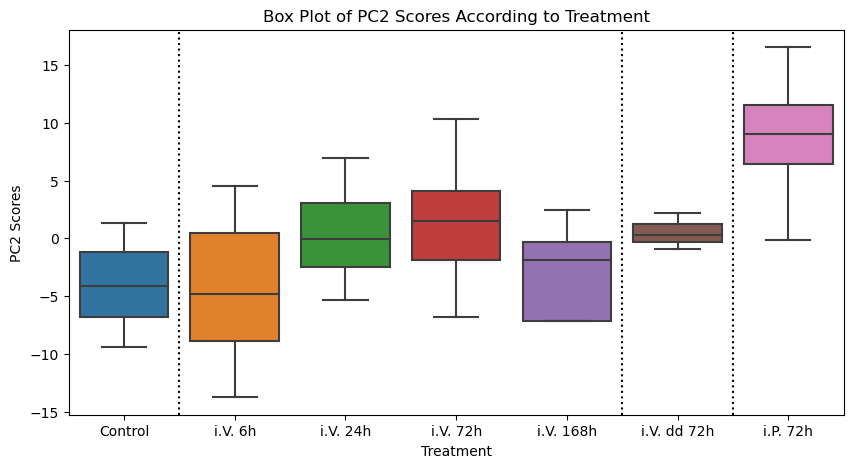

In [53]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sample.ID', y='PC2', data=principal_df)

plt.axvline(x=0.5, linestyle='dotted', color='black')
plt.axvline(x=4.5, linestyle='dotted', color='black')
plt.axvline(x=5.5, linestyle='dotted', color='black')


# Customize the plot
plt.title('Box Plot of PC2 Scores According to Treatment')
plt.xlabel('Treatment')
plt.ylabel('PC2 Scores')

# Show the plot
plt.show()

In [68]:
# Filtering rows where 'Tissue' is 'Jejunum' and 'family' is 'TG'
filtered_TG_df = merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'TG')]

# Get the number of rows in the filtered DataFrame for TG family
number_TG = len(filtered_TG_df)

# Assuming merged_df is your DataFrame
# Filtering rows where 'Tissue' is 'Jejunum' and 'family' is 'FA'
filtered_FA_df = merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'FA')]

# Get the number of rows in the filtered DataFrame for FA family
number_FA = len(filtered_FA_df)

# Displaying the number of rows where Tissue is 'Jejunum' and Family is 'TG'
print("Number of rows where Tissue is 'Jejunum' and Family is 'TG':", number_TG)

# Displaying the number of rows where Tissue is 'Jejunum' and Family is 'FA'
print("Number of rows where Tissue is 'Jejunum' and Family is 'FA':", number_FA)

Number of rows where Tissue is 'Jejunum' and Family is 'TG': 22
Number of rows where Tissue is 'Jejunum' and Family is 'FA': 33


In [55]:
# Filtering rows in merged_df where 'Tissue' is 'Jejunum' and 'family' is 'TG'
tg_rows = merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'TG')]

# Extracting the index names of rows with TG family
tg_row_names = tg_rows.index.tolist()

# Filtering rows in merged_df where 'Tissue' is 'Jejunum' and 'family' is 'FA'
fa_rows = merged_df[(merged_df['Tissue'] == 'Jejunum') & (merged_df['family'] == 'FA')]

# Extracting the index names of rows with FA family
fa_row_names = fa_rows.index.tolist()


In [56]:
# Displaying the row names for TGs
print("Row Names for TGs:")
print(tg_row_names)

# Displaying the row names for FAs
print("\nRow Names for FAs:")
print(fa_row_names)


Row Names for TGs:
['Var_242', 'Var_243', 'Var_244', 'Var_245', 'Var_246', 'Var_247', 'Var_248', 'Var_249', 'Var_250', 'Var_251', 'Var_252', 'Var_253', 'Var_254', 'Var_255', 'Var_256', 'Var_257', 'Var_258', 'Var_259', 'Var_260', 'Var_261', 'Var_262', 'Var_263']

Row Names for FAs:
['Var_125', 'Var_126', 'Var_127', 'Var_128', 'Var_129', 'Var_130', 'Var_131', 'Var_132', 'Var_133', 'Var_134', 'Var_135', 'Var_136', 'Var_137', 'Var_138', 'Var_139', 'Var_140', 'Var_141', 'Var_142', 'Var_143', 'Var_144', 'Var_145', 'Var_146', 'Var_147', 'Var_148', 'Var_149', 'Var_150', 'Var_151', 'Var_152', 'Var_153', 'Var_154', 'Var_155', 'Var_156', 'Var_157']


In [57]:
# Displaying the first few rows of the transposed_signal_df DataFrame

transposed_signal_df.head()

Sample.ID,Control,Control,Control,Control,Control,Control,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,...,i.V. 168h,i.V. dd 72h,i.V. dd 72h,i.V. dd 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h
Var_001,3743702.719371,4545331.53089,3142453.277634,3773137.834686,3685081.419616,3421208.186595,3626865.772023,7160713.896136,4263484.5114,4975084.716659,...,3117842.759022,4517887.479364,4064940.060888,4218097.668331,2472104.128549,3531767.030695,3337174.694232,2864634.517867,4934104.455598,3825841.284982
Var_002,124938.293443,162651.056409,103221.231656,104932.822063,174503.307487,126512.768097,221034.267095,974553.870605,313067.711683,197446.543341,...,187966.125969,93960.243941,114351.083354,89417.739309,30653.459677,68323.560736,65259.573387,48007.093489,455564.877945,71972.762306
Var_003,34342.771479,40449.353857,29182.411423,34026.158212,29162.548885,27475.01862,29583.964958,40599.401482,35031.983025,29147.454602,...,36753.068781,31032.280462,36779.41235,30906.383901,26962.467784,28147.30743,23641.461386,23358.659683,30930.239555,19860.568251
Var_004,3237221.917914,3890073.086094,2627075.939279,2841866.205073,2856276.476992,2418878.431989,2400268.806349,3036836.865801,2421336.367394,2922647.219063,...,2494459.703331,4052450.385699,2965810.810359,2781881.903864,2943109.761655,2917898.265298,2939001.335915,2884041.277203,2418743.922404,3099203.366032
Var_005,2276153.524206,2257931.672254,1540910.816543,1662993.437853,2873556.316456,2008735.84093,2196803.710126,10993933.17595,3567994.970135,2884802.89475,...,1609043.699756,1253800.708666,1383873.611842,1164111.261973,530716.837858,1077920.175003,1074806.065564,809856.305554,6065633.112668,1098639.216255


In [58]:
# Extracting rows from transposed_signal_df for TG family using tg_row_names
signals_TG_df = transposed_signal_df.loc[tg_row_names]

# Displaying the first few rows of the signals_TG_df DataFrame
signals_TG_df.head()

Sample.ID,Control,Control,Control,Control,Control,Control,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,...,i.V. 168h,i.V. dd 72h,i.V. dd 72h,i.V. dd 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h
Var_242,224986.518962,222824.98726,235527.918659,219986.71889,3556897.717756,449533.986091,206555.245583,215505.761876,224668.690385,426025.929993,...,962396.83218,211859.159619,723009.083311,386090.969408,592001.47657,205846.527488,200264.526676,506184.828415,335714.239444,749241.657413
Var_243,2465863.721814,2486565.005852,2322272.665719,2596337.820758,8020593.097473,3391335.631506,2401060.231912,2406479.461666,2395550.343927,2974143.824634,...,4015137.098555,2518499.546023,3351504.675493,2835968.405001,3617604.47065,2793524.641439,2416828.729635,3598500.968681,2708141.997693,3971780.640257
Var_244,974038.817938,642457.264766,639433.724035,826171.913619,38996956.765054,9495680.645246,682588.092741,926644.339642,1054841.250961,11289685.683386,...,42665893.402047,979853.46506,32032786.453412,14159400.666509,19141613.195613,680005.799407,958932.851094,14538286.621715,8276986.28212,30212965.150168
Var_245,413997.375163,246269.993958,183435.240879,352493.210978,42083919.56983,11178733.136763,295548.105971,478303.113794,668112.499911,11454458.106165,...,46492414.923587,480819.638758,28966391.072214,13213970.150642,21000912.927936,298896.625402,262646.372089,13832905.157969,9678300.517818,28337091.178368
Var_246,226411.898338,148348.604138,137516.2237,265019.947969,39621626.829111,6240109.872047,185728.419478,203354.03864,384925.485291,4900913.917369,...,29603340.580529,267489.983162,16687556.087973,6563833.279002,13503383.512402,171912.511279,159012.372242,7884966.576064,4504831.239317,19258717.277632


In [59]:
# Extracting rows from transposed_signal_df for FA family using fa_row_names
signals_FA_df = transposed_signal_df.loc[fa_row_names]

# Displaying the first few rows of the signals_FA_df DataFrame
signals_FA_df.head()

Sample.ID,Control,Control,Control,Control,Control,Control,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,...,i.V. 168h,i.V. dd 72h,i.V. dd 72h,i.V. dd 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h
Var_125,112579.479075,64133.071423,93970.538561,105756.943518,109647.579152,147615.781763,74233.910916,54350.812599,107329.119616,67367.954437,...,67703.162486,18208.633273,60969.087182,33334.396703,31318.575631,90895.424062,21209.772247,59036.85591,42844.605843,44679.232445
Var_126,33360.132273,23173.916541,29010.741517,30797.833533,35343.188933,39604.072676,20851.605969,21234.616878,35960.55764,26783.021081,...,22297.149759,4917.125691,23860.999593,13761.362978,13843.901128,25889.118588,6584.999515,17688.783663,13662.749008,14030.163042
Var_127,244701.259073,164652.950698,251926.831617,326431.483196,269966.689348,365584.862228,190450.31073,152812.093171,318659.40731,185633.739001,...,114945.69169,81813.043534,242870.730013,147621.727349,124422.510599,227417.384564,100026.631243,209125.307042,133783.694027,132567.615172
Var_128,20065720.777074,15223593.948577,19821818.518761,26144621.504733,17880296.747787,26220104.994825,16865673.023588,14679452.081192,23893543.833834,15436228.64309,...,11490598.235266,9324830.829631,14013564.801611,12849711.556467,14099159.823295,20695065.595251,12515086.413226,19541371.703906,15500350.929891,15836079.235328
Var_129,2243236.846569,1373942.486798,1852082.394956,3809647.300398,2691969.289577,3046330.863213,2037534.029663,1717007.49223,2906826.371145,1599439.351006,...,1480033.148752,760407.204986,1813402.389934,1335972.572873,1428914.748489,2657506.750423,1164729.029183,2212495.476686,1758260.63323,1539276.579408


In [60]:
# Calculating the sum of signals for TG family and adding a new column 'Sum_TG'
Signal_df['Sum_TG'] = Signal_df[tg_row_names].sum(axis=1)

# Calculating the sum of signals for FA family and adding a new column 'Sum_FA'
Signal_df['Sum_FA'] = Signal_df[fa_row_names].sum(axis=1)

# Displaying the first few rows of the modified Signal_df DataFrame
Signal_df.head()



,Sample.ID,Var_001,Var_002,Var_003,Var_004,Var_005,Var_006,Var_007,Var_008,Var_009,...,Var_275,Var_276,Var_277,Var_278,Var_279,Var_280,Var_281,Var_282,Sum_TG,Sum_FA
0,Control,3.743703e+06,124938.293443,34342.771479,3.237222e+06,2.276154e+06,1.839204e+06,34907.607230,89996.944201,16844.085970,...,8.243266e+06,3.076412e+06,2.455682e+06,468789.312115,949536.203293,3.570646e+06,4.383112e+06,2.158539e+06,1.266038e+08,1.079254e+08
1,Control,4.545332e+06,162651.056409,40449.353857,3.890073e+06,2.257932e+06,3.007269e+06,33246.503553,127398.013042,13204.654585,...,5.798586e+06,2.158112e+06,1.785545e+06,352497.817013,690960.075104,2.488717e+06,3.200070e+06,1.619211e+06,6.520732e+07,7.156741e+07
2,Control,3.142453e+06,103221.231656,29182.411423,2.627076e+06,1.540911e+06,2.041866e+06,25659.926526,98065.682695,11812.441165,...,5.600473e+06,2.195959e+06,1.721911e+06,306371.714952,717631.631767,2.254739e+06,2.695617e+06,1.367343e+06,7.934060e+07,9.929412e+07
3,Control,3.773138e+06,104932.822063,34026.158212,2.841866e+06,1.662993e+06,2.293310e+06,31054.234981,101527.723095,11785.194302,...,7.698741e+06,3.039581e+06,2.313398e+06,455964.333446,997880.883644,3.242283e+06,4.038372e+06,2.141077e+06,1.333661e+08,1.295742e+08
4,Control,3.685081e+06,174503.307487,29162.548885,2.856276e+06,2.873556e+06,2.286710e+06,26944.366367,97810.560016,15314.622647,...,7.161421e+06,2.801062e+06,2.673250e+06,466810.036712,991277.194366,3.351846e+06,4.238467e+06,1.897259e+06,3.677587e+09,1.153302e+08


In [61]:
# Calculating the log ratio of the sum of signals for TG and FA families and adding a new column 'Log_Ratio'
Signal_df['Log_Ratio'] = np.log(Signal_df['Sum_TG'] / Signal_df['Sum_FA'])

# Displaying the first few rows of the modified Signal_df DataFrame
Signal_df.head()

,Sample.ID,Var_001,Var_002,Var_003,Var_004,Var_005,Var_006,Var_007,Var_008,Var_009,...,Var_276,Var_277,Var_278,Var_279,Var_280,Var_281,Var_282,Sum_TG,Sum_FA,Log_Ratio
0,Control,3.743703e+06,124938.293443,34342.771479,3.237222e+06,2.276154e+06,1.839204e+06,34907.607230,89996.944201,16844.085970,...,3.076412e+06,2.455682e+06,468789.312115,949536.203293,3.570646e+06,4.383112e+06,2.158539e+06,1.266038e+08,1.079254e+08,0.159623
1,Control,4.545332e+06,162651.056409,40449.353857,3.890073e+06,2.257932e+06,3.007269e+06,33246.503553,127398.013042,13204.654585,...,2.158112e+06,1.785545e+06,352497.817013,690960.075104,2.488717e+06,3.200070e+06,1.619211e+06,6.520732e+07,7.156741e+07,-0.093068
2,Control,3.142453e+06,103221.231656,29182.411423,2.627076e+06,1.540911e+06,2.041866e+06,25659.926526,98065.682695,11812.441165,...,2.195959e+06,1.721911e+06,306371.714952,717631.631767,2.254739e+06,2.695617e+06,1.367343e+06,7.934060e+07,9.929412e+07,-0.224336
3,Control,3.773138e+06,104932.822063,34026.158212,2.841866e+06,1.662993e+06,2.293310e+06,31054.234981,101527.723095,11785.194302,...,3.039581e+06,2.313398e+06,455964.333446,997880.883644,3.242283e+06,4.038372e+06,2.141077e+06,1.333661e+08,1.295742e+08,0.028844
4,Control,3.685081e+06,174503.307487,29162.548885,2.856276e+06,2.873556e+06,2.286710e+06,26944.366367,97810.560016,15314.622647,...,2.801062e+06,2.673250e+06,466810.036712,991277.194366,3.351846e+06,4.238467e+06,1.897259e+06,3.677587e+09,1.153302e+08,3.462213


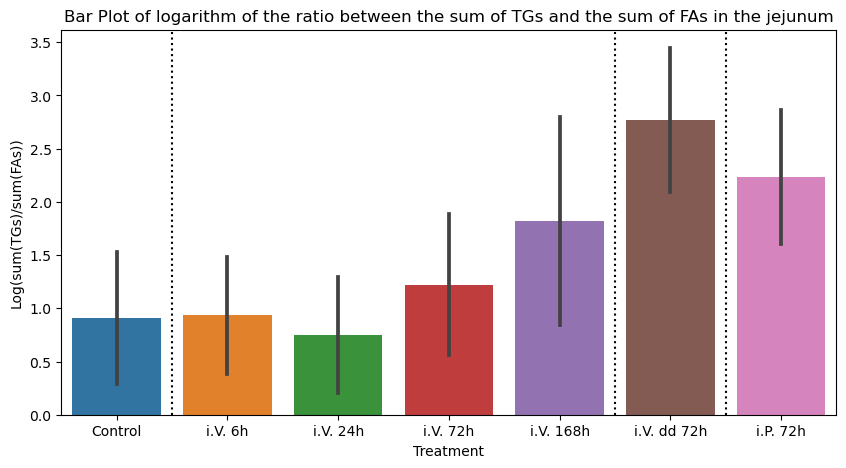

In [62]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Sample.ID', y='Log_Ratio', data=Signal_df, errorbar='se')

plt.axvline(x=0.5, linestyle='dotted', color='black')
plt.axvline(x=4.5, linestyle='dotted', color='black')
plt.axvline(x=5.5, linestyle='dotted', color='black')

# Customize the plot
plt.title('Bar Plot of logarithm of the ratio between the sum of TGs and the sum of FAs in the jejunum')
plt.xlabel('Treatment')
plt.ylabel('Log(sum(TGs)/sum(FAs))')

# Show the plot
plt.show()